In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import k_means
from sklearn.mixture import GaussianMixture

Initialization 0
  Iteration 10
Initialization converged.


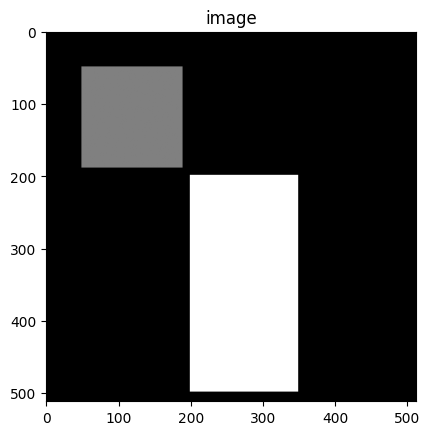

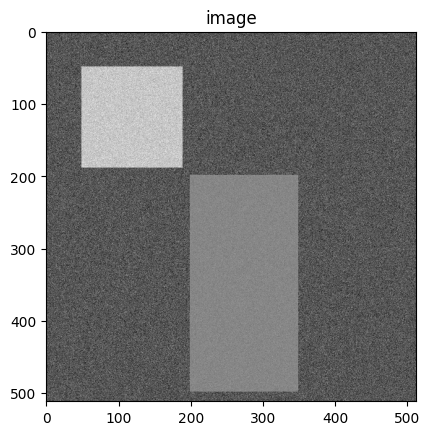

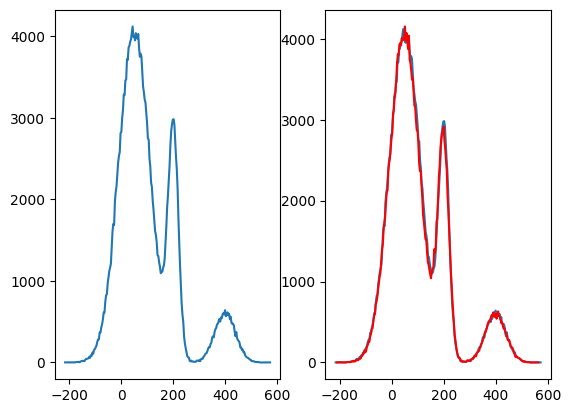

In [2]:
dim = 512
tissueMask = np.zeros((dim, dim), dtype = np.float32)
tissueMask[:,:] = 1
tissueMask[49:189,49:189] = 2
tissueMask[199:499,199:349] = 3

fig, ax = plt.subplots()
ax.imshow(tissueMask, cmap = "gray")
ax.set_title('image')

# create 3 guassian distributions
m1, m2, m3 = 50, 400, 200
sd1, sd2, sd3 = 60, 40, 20

data1 = m1+sd1*np.random.randn(dim, dim) # signal distribution
data2 = m2+sd2*np.random.randn(dim, dim)
data3 = m3+sd3*np.random.randn(dim, dim)
id1 = np.where(tissueMask == 1)
id2 = np.where(tissueMask == 2)
id3 = np.where(tissueMask == 3)

image = np.zeros_like(tissueMask)
image[id1] = data1[id1]
image[id2] = data2[id2]
image[id3] = data3[id3]

fig, ax = plt.subplots()
ax.imshow(image, cmap = "gray")
ax.set_title("image")

# probability of a tissue in the image
p1 = len(id1)/(dim*dim)
p2 = len(id2)/(dim*dim)
p3 = len(id3)/(dim*dim)

# calculate histogram
fig, ax = plt.subplots(1,2)
counts, bins = np.histogram(image, bins = 256)
xcounts = bins[:-1] + np.diff(bins) / 2
ax[0].plot(xcounts,counts)

# apply gaussian mixtures using kmeans as initial condition
image = image.reshape((-1,1))
gmm = GaussianMixture(
    n_components = 3, 
    max_iter = 100, 
    init_params = 'kmeans', 
    verbose = 1)
gmm.fit(image)

n_samples = len(image)

dataGM1 = gmm.means_[0]+np.sqrt(gmm.covariances_[0])*np.random.randn(int(gmm.weights_[0] * n_samples)).flatten()
dataGM2 = gmm.means_[1]+np.sqrt(gmm.covariances_[1])*np.random.randn(int(gmm.weights_[1] * n_samples)).flatten()
dataGM3 = gmm.means_[2]+np.sqrt(gmm.covariances_[2])*np.random.randn(int(gmm.weights_[2] * n_samples)).flatten()
dataGM = np.concatenate([dataGM1.T, dataGM2.T, dataGM3.T])

hGM, edgesGM = np.histogram(dataGM, bins = 256)
xGM = edgesGM[:-1] + np.diff(edgesGM) / 2
ax[1].plot(xcounts,counts)
ax[1].plot(xGM,hGM, color='r')

